<a href="https://colab.research.google.com/github/Giovannacm/nature-inspired-computing/blob/main/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import random
import scipy.stats as stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Atividade perceptron

In [ ]:
class Perceptron:
    
    def __init__(self, tamanho_entrada, taxa_aprendizado):
        self.pesos = np.zeros(tamanho_entrada + 1)
        self.taxa_aprendizado = taxa_aprendizado

    def getPesos(self):
      return self.pesos
    
    def prever(self, entrada): #Função de ativação (sinal)
        soma_ponderada = np.dot(entrada, self.pesos[1:]) + self.pesos[0]  #Calculando a soma ponderada (a primeira posição é o viés, b)
        if soma_ponderada > 0:
            return 1
        else:
            return 0
    
    def treinar(self, entradas, saidas): #Método para treinamento do Perceptron, onde são ajustados seus pesos
        iteracao = 1
        continua = True
        
        while continua: #Esse loop é feito até que o erro seja 0 para todos os elementos do conjunto de treinamento
            print("\nIteração: ", iteracao)
            erros = []  #Inicializando uma lista de erros para verificar a convergência, no final da iteração
            
            for entrada, saida in zip(entradas, saidas):  #Iterando sobre cada par entrada/saida do conjunto de treinamento
                saida_obtida = self.prever(entrada) #Aplicando a função de ativação para a entrada de modo a obter uma suposta saída
                
                erro = saida - saida_obtida  #Calculando o erro do valor desejado com o obtido
                erros.append(erro) #Inserindo o erro em uma lista de erros

                #self.pesos[1:] += self.taxa_aprendizado * erro * entrada #Atualizando o vetor de pesos seguindo a regra w(t+1) = w(t) + taxa_apend*erro*x(t)
                for peso_i in range(len(self.pesos[1:])):
                  self.pesos[peso_i + 1] += self.taxa_aprendizado * erro * entrada[peso_i]
                self.pesos[0] += self.taxa_aprendizado * erro  #Atualizando o viés
                
                print("   Erro: ", erro, " | Pesos: ", self.pesos)
                
            continua = False
            for erro in erros: #Verificando se existem erros diferentes de 0 para saber se o método convergiu ou não
                if erro != 0: #Ainda existem erros em algum conjunto de treinamento
                    continua = True #Então, ainda deve ser feita mais uma iteração
            
            iteracao += 1

In [ ]:
X_treino = [[1, 1, 0, 1],
            [0, 0, 1, 0],
            [1, 1, 0, 0],
            [1, 0, 1, 1],
            [1, 0, 0, 1],
            [0, 0, 1, 1]]

y_treino = np.array([1, 0, 0, 1, 0, 1])

taxa_aprendizado = 0.5

In [ ]:
perceptron = Perceptron(4, taxa_aprendizado)
perceptron.treinar(X_treino, y_treino)


Iteração:  1
   Erro:  1  | Pesos:  [0.5 0.5 0.5 0.  0.5]
   Erro:  -1  | Pesos:  [ 0.   0.5  0.5 -0.5  0.5]
   Erro:  -1  | Pesos:  [-0.5  0.   0.  -0.5  0.5]
   Erro:  1  | Pesos:  [0.  0.5 0.  0.  1. ]
   Erro:  -1  | Pesos:  [-0.5  0.   0.   0.   0.5]
   Erro:  1  | Pesos:  [0.  0.  0.  0.5 1. ]

Iteração:  2
   Erro:  0  | Pesos:  [0.  0.  0.  0.5 1. ]
   Erro:  -1  | Pesos:  [-0.5  0.   0.   0.   1. ]
   Erro:  0  | Pesos:  [-0.5  0.   0.   0.   1. ]
   Erro:  0  | Pesos:  [-0.5  0.   0.   0.   1. ]
   Erro:  -1  | Pesos:  [-1.  -0.5  0.   0.   0.5]
   Erro:  1  | Pesos:  [-0.5 -0.5  0.   0.5  1. ]

Iteração:  3
   Erro:  1  | Pesos:  [0.  0.  0.5 0.5 1.5]
   Erro:  -1  | Pesos:  [-0.5  0.   0.5  0.   1.5]
   Erro:  0  | Pesos:  [-0.5  0.   0.5  0.   1.5]
   Erro:  0  | Pesos:  [-0.5  0.   0.5  0.   1.5]
   Erro:  -1  | Pesos:  [-1.  -0.5  0.5  0.   1. ]
   Erro:  1  | Pesos:  [-0.5 -0.5  0.5  0.5  1.5]

Iteração:  4
   Erro:  0  | Pesos:  [-0.5 -0.5  0.5  0.5  1.5]
   Erro:  0 

In [ ]:
print('Pesos finais:', perceptron.getPesos())

Pesos finais: [-1.  -1.   1.   1.   1.5]


In [ ]:
dic_diagnostico = {0: 'saudável',
                   1: 'doente'}

In [ ]:
X_teste_luis = np.array([0, 0, 0, 1])
dic_diagnostico[perceptron.prever(X_teste_luis)]

'doente'

In [ ]:
X_teste_laura = np.array([1, 1, 1, 1])
dic_diagnostico[perceptron.prever(X_teste_laura)]

'doente'

# Rede perceptron

In [2]:
def mediaGeometrica(x, y):
	return int(math.sqrt(x * y))

def logistica(x):
  return 1 / (1 + math.exp(-x))

def dLogisticaDx(x):
    return math.exp(-x) / ((1 + math.exp(-x))*(1 + math.exp(-x)))

In [22]:
class RedePerceptronBackpropagation:
    
    def __init__(self, taxaAprendizado, pesoInicial, quantidadeClasses, quantidadeNeuroniosCamadaEntrada, quantidadeNeuroniosCamadaOculta, quantidadeNeuroniosCamadaSaida):
      self.taxaAprendizado = taxaAprendizado
      self.quantidadeNeuroniosCamadaEntrada = quantidadeNeuroniosCamadaEntrada
      self.quantidadeNeuroniosCamadaOculta = quantidadeNeuroniosCamadaOculta
      self.quantidadeNeuroniosCamadaSaida = quantidadeNeuroniosCamadaSaida
      self.quantidadeClasses = quantidadeClasses
      #Inicializando os pesos da camada oculta com valores aleatórios entre os valores solicitados com 5 casas decimais
      self.pesosCamadaOculta = [[round(random.uniform(pesoInicial[0], pesoInicial[1]), 5) for i in range(quantidadeNeuroniosCamadaEntrada)] for j in range(quantidadeNeuroniosCamadaOculta)]
      #Inicializando os pesos da camada de saída com valores aleatórios entre os valores solicitados com 5 casas decimais
      self.pesosCamadaSaida = [[round(random.uniform(pesoInicial[0], pesoInicial[1]), 5) for i in range(quantidadeNeuroniosCamadaOculta)] for j in range(quantidadeNeuroniosCamadaSaida)]
      self.netCamadaOculta = [0 for i in range(quantidadeNeuroniosCamadaOculta)]
      self.netCamadaSaida = [0 for i in range(quantidadeNeuroniosCamadaSaida)]
      self.saidaCamadaOculta = [0 for i in range(quantidadeNeuroniosCamadaOculta)]
      self.saidaCamadaSaida = [0 for i in range(quantidadeNeuroniosCamadaSaida)]
      self.errosCamadaOculta = [0 for i in range(quantidadeNeuroniosCamadaOculta)]
      self.errosCamadaSaida = [0 for i in range(quantidadeNeuroniosCamadaSaida)]
      self.dadosTreinamentoRede = []

    def getPesosCamadaOculta(self):
      return self.pesosCamadaOculta
    
    def getPesosCamadaSaida(self):
      return self.pesosCamadaSaida

    def calculaNetsCamadaOculta(self, entradas):	#Calcula os nets da camada oculta
      for j in range(0, self.quantidadeNeuroniosCamadaOculta):
        net = 0
        for i in range(0, self.quantidadeNeuroniosCamadaEntrada):
          net += self.pesosCamadaOculta[j][i] * entradas[i]
        self.netCamadaOculta[j] = net

    def aplicaFuncaoTransferenciaCamadaOculta(self): #Aplica função de transferencia na camada oculta
      for j in range(0, self.quantidadeNeuroniosCamadaOculta):
        self.saidaCamadaOculta[j] = logistica(self.netCamadaOculta[j])

    def calculaNetsCamadaSaida(self, entradas):	    #Calcula os nets da camada de saída
      for j in range(0, self.quantidadeNeuroniosCamadaSaida):
        net = 0
        for i in range(0, self.quantidadeNeuroniosCamadaOculta):
          net += self.pesosCamadaSaida[j][i] * self.saidaCamadaOculta[i]
        self.netCamadaSaida[j] = net

    def aplicaFuncaoTransferenciaCamadaSaida(self): #Aplica função de transferencia na camada de saída
      for j in range(0, self.quantidadeNeuroniosCamadaSaida):
        self.saidaCamadaSaida[j] = logistica(self.netCamadaSaida[j])

    def calculaErrosCamadaSaida(self, saida): #Calcula os erros da camada de saída
      desejado = saida
      
      desejados = [0 for i in range(0, self.quantidadeNeuroniosCamadaSaida)]
      desejados[desejado-1] = 1

      for j in range(0, self.quantidadeNeuroniosCamadaSaida):
        self.errosCamadaSaida[j] = (desejados[j] - self.saidaCamadaSaida[j])*dLogisticaDx(self.netCamadaSaida[j])

    def calculaErrosCamadaOculta(self): #Calcula os erros da camada oculta
      for j in range(0, self.quantidadeNeuroniosCamadaOculta):
        somatorio = 0
        for i in range(0, self.quantidadeNeuroniosCamadaSaida):
          somatorio += self.errosCamadaSaida[i]*self.pesosCamadaSaida[i][j]
        self.errosCamadaOculta[j] = dLogisticaDx(self.netCamadaOculta[j])*somatorio

    def atualizaPesosCamadaSaida(self): #Atualiza  os pesos da camada de saída
      for i in range(0, self.quantidadeNeuroniosCamadaSaida):
        for j in range(0, self.quantidadeNeuroniosCamadaOculta):
          self.pesosCamadaSaida[i][j] += self.taxaAprendizado * self.errosCamadaSaida[i] * self.saidaCamadaOculta[j]

    def atualizaPesosCamadaOculta(self, entradas): #Atualiza  os pesos da camada oculta
      for i in range(0, self.quantidadeNeuroniosCamadaOculta):
        for j in range(0, self.quantidadeNeuroniosCamadaEntrada):
          self.pesosCamadaOculta[i][j] += self.taxaAprendizado * self.errosCamadaOculta[i] * entradas[j]

    def calculaErroRede(self): #Calcula o erro da rede
      somatorio = 0
      for k in range(0, self.quantidadeNeuroniosCamadaSaida):
        somatorio += (self.errosCamadaSaida[k] * self.errosCamadaSaida[k])
      return somatorio/2

    def treinar(self, entradas, saidas, maxIteracao, minErro, entradasVal, saidasVal, printInfo=True): #Realiza os 9 passos necessários para fazer 1 treinamento sobre as amostras, retornando o erro
      iteracao = 0
      erro_iteracao = np.inf
      continua = True
      dadosTreinamento = {'erroRede': [], 'mseTre': [], 'mseVal': []}

      while continua: 
        matrizConfusaoTreinamento = [[0 for i in range(self.quantidadeClasses)] for j in range(self.quantidadeClasses)]
        saidasObtidasTreinamento = []

        for i in range(len(entradas)):
          self.calculaNetsCamadaOculta(entradas[i])
          self.aplicaFuncaoTransferenciaCamadaOculta()
          self.calculaNetsCamadaSaida(entradas[i])
          self.aplicaFuncaoTransferenciaCamadaSaida()
          self.calculaErrosCamadaSaida(saidas[i])
          self.calculaErrosCamadaOculta()
          self.atualizaPesosCamadaSaida()
          self.atualizaPesosCamadaOculta(entradas[i])
          pred = self.atualizaMatrizConfusao(matrizConfusaoTreinamento, saidas[i])
          saidasObtidasTreinamento.append(pred)

        erro_iteracao = self.calculaErroRede()

        mseTreinamento = mean_squared_error(saidas, saidasObtidasTreinamento, squared=True)

        matrizConfusaoVal, saidasObtidasVal = self.teste(entradasVal, saidasVal)
        mseVal = mean_squared_error(saidasVal, saidasObtidasVal, squared=True)

        dadosTreinamento['erroRede'].append(erro_iteracao)
        dadosTreinamento['mseTre'].append(mseTreinamento)
        dadosTreinamento['mseVal'].append(mseVal)

        if printInfo:
          print('\n-> Iteração:', iteracao, '|', 'Erro da rede:', erro_iteracao)
          print('   Treinamento -> MSE:', mseTreinamento, '| Matriz confusão:', matrizConfusaoTreinamento)
          print('   Validação   -> MSE:', mseVal, '| Matriz confusão:', matrizConfusaoVal)

        iteracao += 1
        if maxIteracao:
          continua = True if iteracao < maxIteracao else False
        if minErro:
          continua = True if erro_iteracao > minErro and continua else False

      return dadosTreinamento

    def atualizaMatrizConfusao(self, matrizConfusao, saida): #Alterando os valores obtidos de acordo com a função utilizada e atualizar a matriz de confusão
      desejado = saida
      maior = 0

      for i in range(1, self.quantidadeNeuroniosCamadaSaida): #Pegando o primeiro maior
        if self.saidaCamadaSaida[i] > self.saidaCamadaSaida[maior]:
          maior = i

      maior += 1
      if maior == len(matrizConfusao):
        maior = 0
      matrizConfusao[maior][desejado] += 1 #linha: obtido (primeiro maior), coluna: desejado
      return maior

    def teste(self, entradas, saidas): #Realiza os passos para teste sobre as amostras, apresentando a matriz de confusão
      matrizConfusao = [[0 for i in range(self.quantidadeClasses)] for j in range(self.quantidadeClasses)]
      saidasObtidas = []

      for i in range(len(entradas)):
        self.calculaNetsCamadaOculta(entradas[i])
        self.aplicaFuncaoTransferenciaCamadaOculta()
        self.calculaNetsCamadaSaida(entradas[i])
        self.aplicaFuncaoTransferenciaCamadaSaida()
        pred = self.atualizaMatrizConfusao(matrizConfusao, saidas[i])
        saidasObtidas.append(pred)

      return matrizConfusao, saidasObtidas

In [4]:
def treinarRede(entradas, saidas, entradasVal, saidasVal, taxaAprendizado, pesoInicial, maxIteracao, minErro, printInfo=True):
  quantidadeClasses = len(np.unique(saidas))
  quantidadeNeuroniosCamadaEntrada = len(entradas[0])
  quantidadeNeuroniosCamadaSaida = quantidadeClasses
  quantidadeNeuroniosCamadaOculta = mediaGeometrica(quantidadeNeuroniosCamadaEntrada, quantidadeNeuroniosCamadaSaida)
  
  rede = RedePerceptronBackpropagation(taxaAprendizado, pesoInicial, quantidadeClasses, quantidadeNeuroniosCamadaEntrada, quantidadeNeuroniosCamadaOculta, quantidadeNeuroniosCamadaSaida)
  
  dadosTreinamento = rede.treinar(entradas, saidas, maxIteracao, minErro, entradasVal, saidasVal, printInfo)

  return rede, dadosTreinamento

In [5]:
def classificarDados(rede, entradas, saidas):
  matrizConfusao, saidasObtidas = rede.teste(entradas, saidas)
  mse = mean_squared_error(saidas, saidasObtidas, squared=True)
  return matrizConfusao, mse

In [ ]:
def rodaConfiguracoes(entradas, saidas, entradasVal, saidasVal, entradasTeste, saidasTeste, pesoInicial, maxIteracao, minErro, printInfo=True):
  taxasApendizado = [0.0001, 0.001, 0.01, 0.1, 1]
  quantidadeExecucao = 500

  for taxaAprendizado in taxasApendizado:
    for iteracao in range(quantidadeExecucao):
      rede, dadosTreinamento = treinarRede(entradas, saidas, entradasVal, saidasVal, taxaAprendizado, pesoInicial, maxIteracao, minErro, printInfo)
      matrizConfusao, mse = classificarDados(rede, entradasTeste, saidasTeste)

# Iris data set

## Leitura do conjunto de dados

In [6]:
iris = datasets.load_iris()

In [7]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [8]:
print('Atributos:', iris['feature_names'])

Atributos: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
X = iris['data']
y = iris['target']

In [10]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [11]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
#df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#sns.pairplot(df, hue="target", palette="tab10")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(105, 4)
(22, 4)
(23, 4)


In [15]:
X_train[:10]

array([[6.1, 3. , 4.9, 1.8],
       [6.3, 3.3, 4.7, 1.6],
       [7.7, 3.8, 6.7, 2.2],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 3.7, 1.5, 0.4],
       [5.9, 3. , 5.1, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 3.2, 1.2, 0.2],
       [6.5, 3. , 5.2, 2. ]])

In [16]:
y_train[:10]

array([2, 1, 2, 1, 0, 2, 0, 1, 0, 2])

In [17]:
X_test[:10]

array([[5.4, 3.7, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [6.3, 2.9, 5.6, 1.8],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [4.8, 3.4, 1.6, 0.2],
       [4.9, 3.6, 1.4, 0.1]])

In [18]:
y_test[:10]

array([0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [19]:
X_val[:10]

array([[6. , 2.2, 4. , 1. ],
       [4.5, 2.3, 1.3, 0.3],
       [6.2, 3.4, 5.4, 2.3],
       [6.6, 3. , 4.4, 1.4],
       [5.7, 4.4, 1.5, 0.4],
       [6.8, 3.2, 5.9, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.9, 3. , 1.4, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.7, 2.5, 5.8, 1.8]])

In [20]:
y_val[:10]

array([1, 0, 2, 1, 0, 2, 0, 0, 1, 2])

## Treinamento da rede e classificação dos dados de teste

In [23]:
rede_iris, dadosTreinamento_iris = treinarRede(X_train, y_train, X_val, y_val, taxaAprendizado=0.01, pesoInicial=(-0.1, 0.1), maxIteracao=5000, minErro=None)

A saída de streaming foi truncada nas últimas 5000 linhas.

-> Iteração: 3750 | Erro da rede: 2.678523907727582e-06
   Treinamento -> MSE: 0.02857142857142857 | Matriz confusão: [[32, 0, 0], [0, 32, 0], [0, 3, 38]]
   Validação   -> MSE: 0.0 | Matriz confusão: [[9, 0, 0], [0, 7, 0], [0, 0, 7]]

-> Iteração: 3751 | Erro da rede: 2.676964217325668e-06
   Treinamento -> MSE: 0.02857142857142857 | Matriz confusão: [[32, 0, 0], [0, 32, 0], [0, 3, 38]]
   Validação   -> MSE: 0.0 | Matriz confusão: [[9, 0, 0], [0, 7, 0], [0, 0, 7]]

-> Iteração: 3752 | Erro da rede: 2.675405905275968e-06
   Treinamento -> MSE: 0.02857142857142857 | Matriz confusão: [[32, 0, 0], [0, 32, 0], [0, 3, 38]]
   Validação   -> MSE: 0.0 | Matriz confusão: [[9, 0, 0], [0, 7, 0], [0, 0, 7]]

-> Iteração: 3753 | Erro da rede: 2.673848969955398e-06
   Treinamento -> MSE: 0.02857142857142857 | Matriz confusão: [[32, 0, 0], [0, 32, 0], [0, 3, 38]]
   Validação   -> MSE: 0.0 | Matriz confusão: [[9, 0, 0], [0, 7, 0], [0, 0, 7

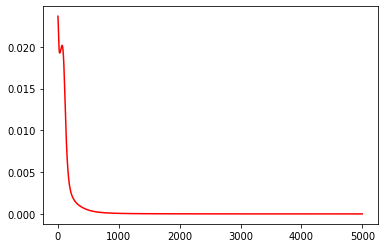

In [26]:
y = dadosTreinamento_iris
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['erroRede'], 'r')

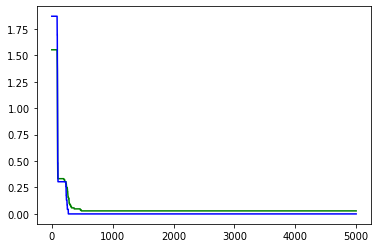

In [27]:
y = dadosTreinamento_iris
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['mseTre'], 'g-')
plt.plot(x, y['mseVal'], 'b-')

In [28]:
matriz_confusao_iris, mse = classificarDados(rede_iris, X_test, y_test)

In [29]:
matriz_confusao_iris

[[9, 0, 0], [0, 8, 2], [0, 0, 3]]

In [30]:
mse

0.09090909090909091

# Wine data set

## Leitura do conjunto de dados

In [31]:
wine = datasets.load_wine(as_frame=True)

In [32]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [33]:
wine_normed = wine['data'].apply(stats.zscore)

In [34]:
wine_normed

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [35]:
X = np.array(wine_normed.values.tolist()) #wine['data']
y = np.array(wine['target'].values.tolist())

In [36]:
X[:10]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401],
       [ 1.48155459, -0.517366

In [37]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
#df = pd.DataFrame(data= np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['target'])
#sns.pairplot(df, hue="target", palette="tab10")

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(124, 13)
(27, 13)
(27, 13)


## Treinamento da rede e classficiação dos dados de teste

In [41]:
rede_wine, dadosTreinamento_wine = treinarRede(X_train, y_train, X_val, y_val, taxaAprendizado=0.001, pesoInicial=(-0.1, 0.1), maxIteracao=1500, minErro=None)

A saída de streaming foi truncada nas últimas 5000 linhas.

-> Iteração: 250 | Erro da rede: 0.015397028298211917
   Treinamento -> MSE: 0.43548387096774194 | Matriz confusão: [[20, 0, 0], [20, 50, 34], [0, 0, 0]]
   Validação   -> MSE: 0.5185185185185185 | Matriz confusão: [[4, 0, 0], [4, 9, 10], [0, 0, 0]]

-> Iteração: 251 | Erro da rede: 0.015399513084781588
   Treinamento -> MSE: 0.4274193548387097 | Matriz confusão: [[21, 0, 0], [19, 50, 34], [0, 0, 0]]
   Validação   -> MSE: 0.5185185185185185 | Matriz confusão: [[4, 0, 0], [4, 9, 10], [0, 0, 0]]

-> Iteração: 252 | Erro da rede: 0.01540215529972009
   Treinamento -> MSE: 0.4274193548387097 | Matriz confusão: [[21, 0, 0], [19, 50, 34], [0, 0, 0]]
   Validação   -> MSE: 0.5185185185185185 | Matriz confusão: [[4, 0, 0], [4, 9, 10], [0, 0, 0]]

-> Iteração: 253 | Erro da rede: 0.015404954754484567
   Treinamento -> MSE: 0.4274193548387097 | Matriz confusão: [[21, 0, 0], [19, 50, 34], [0, 0, 0]]
   Validação   -> MSE: 0.518518518518

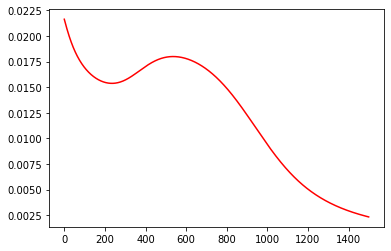

In [44]:
y = dadosTreinamento_wine
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['erroRede'], 'r')

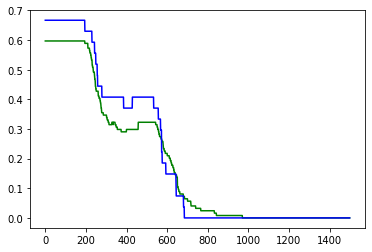

In [45]:
y = dadosTreinamento_wine
x = np.arange(0, len(y['erroRede']))

plt.plot(x, y['mseTre'], 'g-')
plt.plot(x, y['mseVal'], 'b-')

In [46]:
matriz_confusao_wine, mse = classificarDados(rede_wine, X_test, y_test)
matriz_confusao_wine

[[11, 0, 0], [0, 11, 0], [0, 1, 4]]

In [47]:
mse

0.037037037037037035

# Rede neural convolucional para classificação de imagens

In [48]:
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

## Baixando e explorando o conjunto de dados

Data set consiste em 3.670 fotos de flores com cinco subdiretórios, um por classe: daisy, dandelion, roses, sunflowers e tulips.

In [49]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [50]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Quantidade de imagens:', image_count)

Quantidade de imagens: 3670


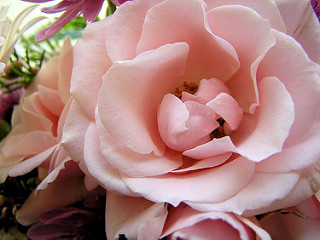

In [51]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))

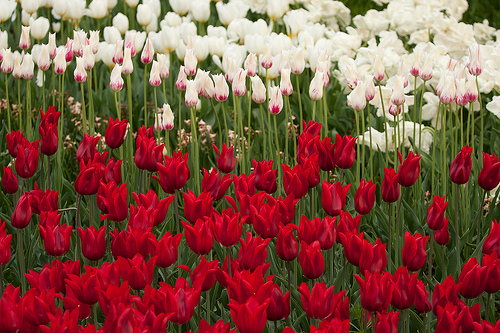

In [52]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

## Carregando os dados por meio do utilitário do Keras

In [53]:
batch_size = 32
img_height = 180
img_width = 180

In [54]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [56]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [57]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Visualizando os dados

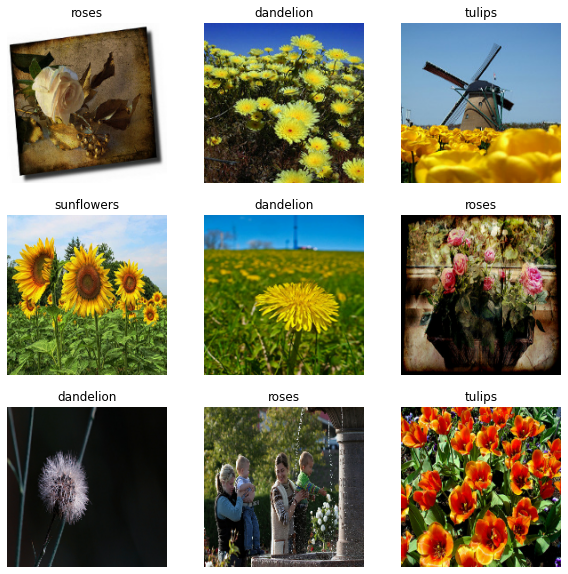

In [58]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [59]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


O image_batch é um tensor da forma (32, 180, 180, 3). Este é um lote de 32 imagens de formato 180x180x3 (ou seja, uma imagem colorida). O label_batch é um tensor da forma (32,) , estes são os rótulos correspondentes às 32 imagens.

## Configurando o conjunto de dados para desempenho

In [60]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Normalizando os dados

[0, 255] para [0, 1]

In [61]:
normalization_layer = layers.Rescaling(1./255)

In [62]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print('Valor mínimo:', np.min(first_image))
print('Valor máximo:', np.max(first_image))

Valor mínimo: 0.0
Valor máximo: 0.9980883


## Criação do modelo

O modelo Sequencial consiste em três blocos de convolução (tf.keras.layers.Conv2D) com uma camada de agrupamento máximo (tf.keras.layers.MaxPooling2D) em cada um deles. Há uma camada totalmente conectada (tf.keras.layers.Dense) com 128 unidades em cima dela que é ativada por uma função de ativação ReLU ('relu').

Uma camada de aumento de dados será utilizada de modo a evitar overfitting (acontece quando existe um número pequeno de dados de treinamento, por exemplo). Essa camada gera dados de treinamento adicionais a partir dos exemplos já existentes. Tais dados são gerados por meio de transformações aleatórias que produzem outras imagens de aparência relevante. Esse processo expõem a rede/modelo a mais aspectos dos dados, aumentando a capacidade de generalização.

In [63]:
num_classes = len(class_names)

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

## Treinamento do modelo

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 107s 1s/step - loss: 1.2302 - accuracy: 0.4830 - val_loss: 1.0584 - val_accuracy: 0.5586
Epoch 2/15
92/92 [==============================] - 104s 1s/step - loss: 1.0131 - accuracy: 0.5943 - val_loss: 0.9672 - val_accuracy: 0.6185
Epoch 3/15
92/92 [==============================] - 103s 1s/step - loss: 0.9131 - accuracy: 0.6485 - val_loss: 0.9674 - val_accuracy: 0.6063
Epoch 4/15
92/92 [==============================] - 104s 1s/step - loss: 0.8411 - accuracy: 0.6737 - val_loss: 0.8808 - val_accuracy: 0.6662
Epoch 5/15
92/92 [==============================] - 104s 1s/step - loss: 0.7838 - accuracy: 0.7033 - val_loss: 0.8169 - val_accuracy: 0.6921
Epoch 6/15
92/92 [==============================] - 103s 1s/step - loss: 0.7393 - accuracy: 0.7166 - val_loss: 0.8097 - val_accuracy: 0.7057
Epoch 7/15
92/92 [==============================] - 103s 1s/step - loss: 0.7233 - accuracy: 0.7268 - val_loss: 0.7954 - val_accuracy: 0.6962
Epoch 8/15
92

## Visualizando os dados do treinamento

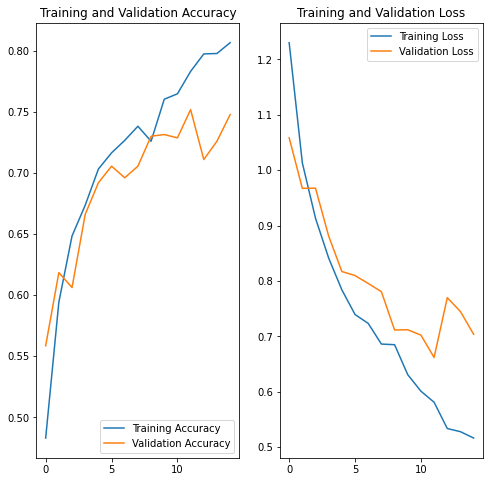

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Prevendo novos dados

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

131072/117948 [=================================] - 0s 0us/step
This image most likely belongs to sunflowers with a 98.04 percent confidence.


## Referência
* https://www.tensorflow.org/tutorials/images/classification